# Moore's Law

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import *
import numpy as np

data = pd.read_csv('Downloads/analyze-spec-benchmarks-master/benchmarks.csv', sep=",", header=0)
data = pd.DataFrame.sort_values(data, by ='benchName')

# we choose the benchName to be '099.go'
df = data.loc[data['benchName'] == "099.go"]
df['testID'] = df['testID'].astype(str)
df = df.drop(df[df.testID.str.len() == 4].index)
df['dates']= df['testID'].str.split('-').values.tolist()

df = pd.concat([df.base, df.dates.apply(pd.Series).add_prefix("vals_")], axis=1)
df.columns = ['base', 'cpu95', 'dates', 'id?']
for row in range(len(df.dates)):
    if len(df.dates.iloc[row]) == 6:
        df.dates.iloc[row] = '19' + df.dates.iloc[row]

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/anaconda3/li

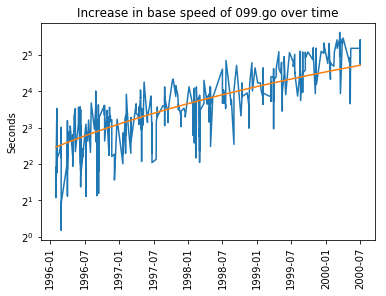

In [2]:
df.dates = pd.to_datetime(df.dates)
df['ts'] = df[['dates']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

df = df.sort_values('dates', ascending = True)
df['log'] = np.log2(df['base'])

lm = linear_model.LinearRegression()
model = lm.fit(df.ts.values.reshape(494,1), df.log)

plt.semilogy(df.dates, df.base, basey = 2)
plt.plot(df.dates, np.power(lm.predict(df.ts.values.reshape(494,1)),2))
plt.title("Increase in base speed of 099.go over time")
plt.ylabel("Seconds")
plt.xticks(rotation="vertical")
plt.show()